#  Import dependencies and load the data 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.9.12
Tensorflow version: 2.9.1
Keras version: 2.9.0


In [3]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

# Clear any logs from previous runs.
!rm -rf ./.logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


# Load MNIST data

In [4]:
train_mnist = pd.read_csv('train.csv')
test_mnist = pd.read_csv('test.csv')

In [5]:
test_mnist.shape

(28000, 784)

In [6]:
train_mnist.shape

(42000, 785)

In [7]:
from tensorflow.keras.datasets import mnist

# Load MNIST data
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

In [8]:
X_test_mnist.shape
X_test_mnist_re = X_test_mnist.reshape(10000,784)
X_test_mnist_re.shape

(10000, 784)

In [9]:
X_train_mnist.shape
X_train_mnist_re = X_train_mnist.reshape(60000,784)
X_train_mnist_re.shape
pd.DataFrame(X_train_mnist_re).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_test_mnist.sum(axis=1)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 517, 190,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 648, 425,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint32)

In [11]:
X_train_mnist = train_mnist.iloc[:, 1:785]
y_train_mnist = train_mnist.iloc[:, 0]

X_test_mnist = test_mnist.iloc[:, 0:784]

In [12]:
X_train_mnist.shape, y_train_mnist.shape,type(X_train_mnist),type(y_train_mnist)

((42000, 784),
 (42000,),
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [13]:
X_train_mnist.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# QMNIST - The Extended MNIST Dataset (120k images)
Using to improve the performance of the digit recognition model with the expanded version of MNIST data

Load QMNIST data

In [14]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [15]:
# Read qmnist data
qmnist = unpickle("MNIST-120k")
X_train_qmnist = qmnist['data']

y_train_qmnist = pd.Series(qmnist['labels'].reshape(120000))

In [16]:
X_train_qmnist.shape, y_train_qmnist.shape,type(X_train_qmnist),type(y_train_qmnist)

((120000, 28, 28), (120000,), numpy.ndarray, pandas.core.series.Series)

In [17]:
X_train_qmnist_re = X_train_qmnist.reshape(120000,784)

In [18]:
X_train_qmnist_re = pd.DataFrame(X_train_qmnist_re)

In [19]:
X_train_qmnist_re.shape, y_train_qmnist.shape,type(X_train_qmnist_re),type(y_train_qmnist)

((120000, 784),
 (120000,),
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [20]:
#X_train_mnist.columns
X_train_qmnist_re.columns = X_train_mnist.columns
X_train_qmnist_re.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Combine MNIST and QMNIST

In [21]:
X_train_mnist.shape,X_train_qmnist_re.shape

((42000, 784), (120000, 784))

In [22]:
X_train = pd.concat([X_train_mnist,X_train_qmnist_re],axis=0)

In [23]:
y_train_mnist.shape,y_train_qmnist.shape

((42000,), (120000,))

In [24]:
y_train = pd.concat([y_train_mnist,y_train_qmnist],axis=0)
X_train.shape, y_train.shape

((162000, 784), (162000,))

# 3. Data Overview 


3.1 Diamension of train and test data 


In [25]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_train.info(), X_train.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162000 entries, 0 to 119999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 970.2 MB


(None, (162000, 784))

In [27]:
X_test_mnist.info(),  X_test_mnist.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

# 3.2 Visualizing the data using TSNE 
Back to Table of Contents

TSNE - t-Distributed Stochastic Neighbor embedding. This is a dimensionality reduction algorithm that is designed to keep local structure in the high dimensional data set, but cares less about global structure. Here, we use it to go from the 784 pixel-dimension of the images to two dimensions. This makes plotting easier. The color scale is the original MNIST label and one can see that the separation of the labels is apparent.

In [28]:
# WARNING: running t-SNE on the full data set takes a while.
# X_tsn = X_train/255

# from sklearn.manifold import TSNE
# tsne = TSNE()

# tsne_res = tsne.fit_transform(X_tsn)
# plt.figure(figsize=(14, 12))
# plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
# plt.xticks([])
# plt.yticks([])
# plt.colorbar()

# Diamension of training data

In [29]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
# print('X_validation:', X_validation.shape)
# print('y_validation:', y_validation.shape)

X_train: (162000, 784)
y_train: (162000,)


# Converting training, and testing data into array

In [30]:
pd.DataFrame(y_train).head()

,0
0,1
1,0
2,1
3,4
4,0


In [31]:
x_train_re = X_train.to_numpy().reshape(162000, 28, 28)
y_train_re = y_train.values
#x_validation_re = X_validation.to_numpy().reshape(32400, 28, 28)
#y_validation_re = y_validation.values
x_test_re = X_test_mnist.to_numpy().reshape(28000, 28, 28)

# Diamension of training, and testing data after reshape

In [32]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
#print('x_validation:', x_validation_re.shape)
#print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (162000, 28, 28)
y_train: (162000,)
x_test: (28000, 28, 28)


In [33]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


# 4. Explore the data


Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from 0 to 255) and each integer represents a color of a pixel.

In [34]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,188,255,94,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,191,250,253,93,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,123,248,253,167,10,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,247,253,208,13,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,253,235,77,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,253,88,0,0,0,0,0,0,0,0


# 4.1 Visualise how the digits were written 


This number matrix may be drawn as follows:

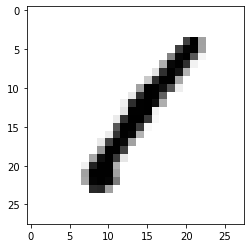

In [35]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()

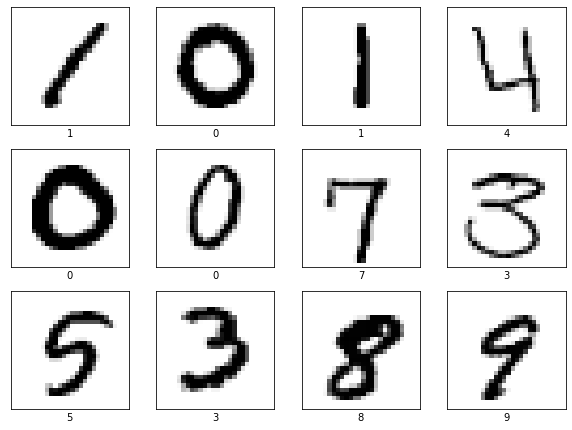

In [36]:
numbers_to_display = 12
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

# 4.2 Reshaping train, test, and validation data 

In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of (28, 28) which means that it is a 28x28 matrix of color values form 0 to 255. We need to reshape it to (28, 28, 1) shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [37]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

# x_validation_with_chanels = x_validation_re.reshape(
#     x_validation_re.shape[0],
#     IMAGE_WIDTH,
#     IMAGE_HEIGHT,
#     IMAGE_CHANNELS
# )

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [38]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
#print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (162000, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


# 4.3 Normalize train, test, and validation data 


Here we're just trying to normalize from values range of [0...255] to [0...1].

In [39]:
x_train_normalized = x_train_with_chanels / 255
#x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [40]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.36470588],
       [0.99607843],
       [0.99215686],
       [0.93333333],
       [0.66666667],
       [0.06666667],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

# 5. Build the CNN model to Classify Handwritten Digits 


We are using Sequential Keras model which have two pairs of Convolution2D and MaxPooling2D layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use Flatten layer to convert multidimensional parameters to vector.

The last layer will be a Dense layer with 10 Softmax outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is 0, the 1-st output represents a probability that the input digit is 1 and so on...

In [41]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

# 5.1 Summary of the training model 

Here is our model summary so far.

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

# 5.2 Visualization of the model using graphviz 

In order to plot the model the graphviz should be installed.

In [48]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 5.3 Compile the model using keras.optimizers.Adam

In [45]:
import tensorflow as tf
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# 5.4 Train the model 

Data Augmentation We will use Data Augmentation to provide more data during the training process.

In [49]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.20,
    shear_range=15,
    zoom_range=0.10,
    validation_split=0.25,
    horizontal_flip=False
)

train_generator = datagen.flow(
    x_train_normalized,
    y_train_re, 
    batch_size=256,
    subset='training',
)

validation_generator = datagen.flow(
    x_train_normalized,
    y_train_re, 
    batch_size=64,
    subset='validation',
)

In [50]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.1,
                                                 patience=5,
                                                 min_lr=0.000001,
                                                 verbose=1)

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='model.hdf5',
                                                monitor='val_loss',
                                                save_best_only=True,
                                                save_weights_only=True,
                                                verbose=1)

In [51]:
training_history = model.fit_generator(train_generator, 
                              epochs=50, 
                              validation_data=validation_generator, 
                              callbacks=[reduce_lr,checkpoint], 
                              verbose=1)

C:\Users\dubey\AppData\Local\Temp\ipykernel_9556\566919499.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_history = model.fit_generator(train_generator,


Epoch 1/50
475/475 [==============================] - ETA: 0s - loss: 0.6368 - accuracy: 0.7944
Epoch 1: val_loss improved from inf to 0.24415, saving model to model.hdf5
475/475 [==============================] - 46s 95ms/step - loss: 0.6368 - accuracy: 0.7944 - val_loss: 0.2441 - val_accuracy: 0.9242 - lr: 0.0010
Epoch 2/50
475/475 [==============================] - ETA: 0s - loss: 0.2439 - accuracy: 0.9246
Epoch 2: val_loss improved from 0.24415 to 0.16803, saving model to model.hdf5
475/475 [==============================] - 47s 99ms/step - loss: 0.2439 - accuracy: 0.9246 - val_loss: 0.1680 - val_accuracy: 0.9475 - lr: 0.0010
Epoch 3/50
475/475 [==============================] - ETA: 0s - loss: 0.1862 - accuracy: 0.9427
Epoch 3: val_loss improved from 0.16803 to 0.14907, saving model to model.hdf5
475/475 [==============================] - 49s 103ms/step - loss: 0.1862 - accuracy: 0.9427 - val_loss: 0.1491 - val_accuracy: 0.9539 - lr: 0.0010
Epoch 4/50
475/475 [====================

Epoch 27/50
475/475 [==============================] - ETA: 0s - loss: 0.0655 - accuracy: 0.9799
Epoch 27: val_loss did not improve from 0.04852
475/475 [==============================] - 49s 103ms/step - loss: 0.0655 - accuracy: 0.9799 - val_loss: 0.0487 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 28/50
475/475 [==============================] - ETA: 0s - loss: 0.0637 - accuracy: 0.9804
Epoch 28: val_loss improved from 0.04852 to 0.04546, saving model to model.hdf5
475/475 [==============================] - 50s 106ms/step - loss: 0.0637 - accuracy: 0.9804 - val_loss: 0.0455 - val_accuracy: 0.9857 - lr: 0.0010
Epoch 29/50
475/475 [==============================] - ETA: 0s - loss: 0.0616 - accuracy: 0.9810
Epoch 29: val_loss improved from 0.04546 to 0.04491, saving model to model.hdf5
475/475 [==============================] - 46s 97ms/step - loss: 0.0616 - accuracy: 0.9810 - val_loss: 0.0449 - val_accuracy: 0.9859 - lr: 0.0010
Epoch 30/50
475/475 [==============================] - ETA: 0

# 6. Model evaluation# 

# 6.1 Loss plot curve for training and validation
Back to Table of Contents

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

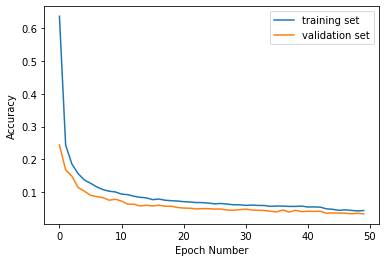

In [52]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

# 6.2. Accuracy plot curve for training and validation

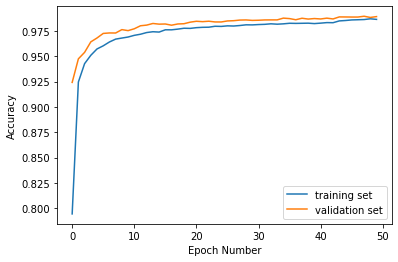

In [53]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

# 6.3. Evaluation of the model accuracy
Back to Table of Contents

We need to compare the accuracy of our model on training set and on valiation set. We expect our model to perform similarly on both sets. If the performance on a validation set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

6.3.1 Performance of training dataset 

In [55]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)


In [56]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.01894652284681797
Train accuracy:  0.9940246939659119


# 6.3.2. Load the model
Back to Table of Contents

We will save the entire model to a HDF5 file. The .h5 extension of the file indicates that the model shuold be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format.

In [57]:
# model_name = 'digits_recognition_cnn.h5'
# model.save(model_name, save_format='h5')
#loaded_model = tf.keras.models.load_model(model_name)
model.load_weights('model.hdf5')

# 7. Model prediction on unseen dataset (test data)

In [58]:
predictions_one_hot = model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

875/875 [==============================] - 3s 3ms/step
predictions_one_hot: (28000, 10)


Each prediction has ten probabilities (one for each number from 0 to 9). We need to choose the digit with the highest probability.

#Predicted probabilities of all digits.


In [61]:
pd.DataFrame(predictions_one_hot)
             

,0,1,2,3,4,5,6,7,8,9
0,1.781171e-12,1.442291e-11,9.999989e-01,2.989957e-07,8.458501e-09,9.151321e-08,4.563856e-12,6.654272e-07,9.626757e-11,4.231548e-09
1,9.999995e-01,2.505558e-12,1.321511e-08,2.180716e-11,4.247059e-09,1.036556e-07,1.765668e-07,2.628981e-11,6.667927e-09,1.353229e-07
2,3.163892e-10,3.170540e-12,6.300222e-06,8.214946e-08,4.385194e-07,4.779413e-08,9.421623e-09,4.572646e-08,9.760632e-05,9.998955e-01
3,8.439262e-01,2.731243e-06,4.284543e-02,2.331229e-02,1.112707e-03,1.645338e-03,5.197275e-03,7.870293e-05,5.270755e-02,2.917184e-02
4,1.468043e-22,1.551448e-14,4.842058e-10,1.000000e+00,1.767710e-19,4.717468e-10,2.184462e-20,6.716866e-14,4.835097e-11,7.986035e-14
...,...,...,...,...,...,...,...,...,...,...
27995,2.029743e-14,1.619046e-17,3.017429e-10,4.252064e-12,6.000774e-09,7.299546e-11,2.192801e-14,5.231710e-10,4.807209e-10,1.000000e+00
27996,5.196819e-09,2.165186e-06,9.053892e-05,1.365667e-05,1.239415e-06,3.663089e-07,3.026167e-11,9.998845e-01,2.342146e-07,7.319047e-06
27997,5.802587e-24,8.816616e-14,6.442450e-12,1.000000e+00,8.935451e-20,7.184616e-09,5.426159e-21,1.054883e-13,2.215899e-11,1.463649e-14
27998,2.275881e-11,1.425552e-12,8.731581e-08,5.421106e-08,2.616366e-06,6.535109e-09,9.417002e-13,8.534664e-07,1.076356e-09,9.999964e-01


7.1 Visualise test predicted data how the digits were written¶
Back to Table of Contents

Predicted digits with highest probabilites

Actual first digit from the test data

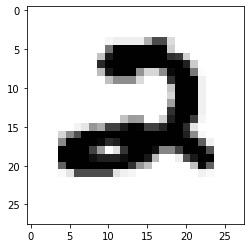

In [62]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

So our model is predicting that the first example from the test data is 2 and actual was also 2.

# 8. Submission 

In [63]:
test_pred = pd.DataFrame( model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

875/875 [==============================] - 2s 3ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [64]:
test_pred.to_csv('submission.csv', index = False)